In [13]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names


--2024-06-07 02:23:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.9MB/s    in 15s     

2024-06-07 02:24:10 (15.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-06-07 02:24:10--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [1]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names


--2024-06-07 06:19:01--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  50.2MB/s    in 4.9s    

2024-06-07 06:19:06 (48.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-06-07 06:19:06--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

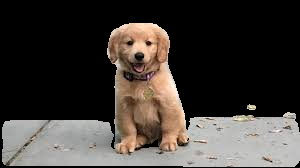

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load pre-trained Mask R-CNN model
mask_rcnn = maskrcnn_resnet50_fpn(pretrained=True)
mask_rcnn.eval()

def adjust_highlight_contrast(image: np.array, highlight: int = 0, contrast: int = 0) -> np.array:
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = np.clip(l + highlight, 0, 255)
    if contrast != 0:
        if contrast > 0:
            f = 259 * (contrast + 255) / (255 * (259 - contrast))
        else:
            f = 259 * (contrast + 255) / (255 * (259 + contrast))
        l = np.clip(f * (l - 128) + 128, 0, 255)
    lab = cv2.merge((l, a, b))
    adjusted_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return adjusted_image

def change_color(image: np.array, object_name: str, color: tuple) -> np.array:
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = mask_rcnn(image_tensor)
    labels = outputs[0]['labels'].cpu().numpy()
    masks = outputs[0]['masks'].cpu().numpy()
    object_ids = [i for i, label in enumerate(labels) if 0 <= label - 1 < len(classes) and classes[label - 1] == object_name]
    for object_id in object_ids:
        mask = masks[object_id, 0]
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        image[mask > 0.5] = color
    return image

# def change_color(image: np.array, object_name: str, target_color: tuple, new_color: tuple, tolerance: int = 40) -> np.array:
#     transform = T.Compose([T.ToTensor()])
#     image_tensor = transform(image).unsqueeze(0)
#     with torch.no_grad():
#         outputs = mask_rcnn(image_tensor)
#     labels = outputs[0]['labels'].cpu().numpy()
#     masks = outputs[0]['masks'].cpu().numpy()

#     object_ids = [i for i, label in enumerate(labels) if 0 <= label - 1 < len(classes) and classes[label - 1] == object_name]
#     for object_id in object_ids:
#         mask = masks[object_id, 0]
#         mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

#         # Find areas within the mask that match the target color
#         object_pixels = image[mask > 0.5]
#         target_color_np = np.array(target_color)
#         color_distance = np.linalg.norm(object_pixels - target_color_np, axis=1)
#         matching_pixels = np.where(color_distance <= tolerance)

#         # Apply new color to the matching areas
#         object_pixels[matching_pixels] = new_color
#         image[mask > 0.5] = object_pixels

#     return image


def remove_background(image: np.array) -> np.array:
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = mask_rcnn(image_tensor)
    masks = outputs[0]['masks'].cpu().numpy()
    background_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    for mask in masks:
        mask_resized = cv2.resize(mask[0], (image.shape[1], image.shape[0]))
        background_mask = cv2.bitwise_or(background_mask, (mask_resized > 0.5).astype(np.uint8))
    result = cv2.bitwise_and(image, image, mask=background_mask)
    return result

def remove_objects(image: np.array, object_name: str) -> np.array:
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = mask_rcnn(image_tensor)
    labels = outputs[0]['labels'].cpu().numpy()
    masks = outputs[0]['masks'].cpu().numpy()
    object_ids = [i for i, label in enumerate(labels) if 0 <= label - 1 < len(classes) and classes[label - 1] == object_name]

    mask_combined = np.zeros(image.shape[:2], dtype=np.uint8)
    for object_id in object_ids:
        mask = masks[object_id, 0]
        mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
        mask_combined = cv2.bitwise_or(mask_combined, (mask_resized > 0.5).astype(np.uint8))

    kernel = np.ones((5,5), np.uint8)
    mask_combined = cv2.dilate(mask_combined, kernel, iterations=1)
    mask_combined = cv2.erode(mask_combined, kernel, iterations=1)
    mask_combined = cv2.GaussianBlur(mask_combined, (5, 5), 0)

    inpainted_image = cv2.inpaint(image, mask_combined, 3, cv2.INPAINT_TELEA)
    return inpainted_image

def blur_object(image: np.array, object_name: str, blur_strength: int = 5) -> np.array:
    if blur_strength % 2 == 0:
        blur_strength += 1
    if blur_strength <= 0:
        blur_strength = 1

    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = mask_rcnn(image_tensor)
    labels = outputs[0]['labels'].cpu().numpy()
    masks = outputs[0]['masks'].cpu().numpy()
    object_ids = [i for i, label in enumerate(labels) if 0 <= label - 1 < len(classes) and classes[label - 1] == object_name]

    for object_id in object_ids:
        mask = masks[object_id, 0]
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        blurred_image = cv2.GaussianBlur(image, (blur_strength, blur_strength), 0)
        image[mask > 0.5] = blurred_image[mask > 0.5]
    return image

def sharpen_image(image: np.array, alpha: float = 1.5, beta: float = -0.5, gamma: float = 0) -> np.array:
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, alpha, blurred, beta, gamma)
    return sharpened

def rotate_image(image: np.array, angle: float) -> np.array:
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def overlay_text(image: np.array, text: str, position: tuple = (50, 50), font_size: float = 1.0, color: tuple = (255, 255, 255), thickness: int = 2) -> np.array:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, position, font, font_size, color, thickness, cv2.LINE_AA)
    return image

def crop_image(image: np.array, x: int, y: int, width: int, height: int) -> np.array:
    return image[y:y+height, x:x+width]

def grayscale_object(image: np.array, object_name: str) -> np.array:
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        outputs = mask_rcnn(image_tensor)
    labels = outputs[0]['labels'].cpu().numpy()
    masks = outputs[0]['masks'].cpu().numpy()
    object_ids = [i for i, label in enumerate(labels) if 0 <= label - 1 < len(classes) and classes[label - 1] == object_name]

    for object_id in object_ids:
        mask = masks[object_id, 0]
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image[mask > 0.5] = cv2.cvtColor(gray[mask > 0.5], cv2.COLOR_GRAY2BGR)
    return image

def adjust_brightness(image: np.array, brightness: int) -> np.array:
    return cv2.convertScaleAbs(image, alpha=1, beta=brightness)

def adjust_saturation(image: np.array, saturation_scale: float) -> np.array:
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[...,1] = hsv[...,1] * saturation_scale
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def flip_image(image: np.array, direction: str) -> np.array:
    if direction == "horizontal":
        return cv2.flip(image, 1)
    elif direction == "vertical":
        return cv2.flip(image, 0)
    else:
        return image

def edit_image(image_path: str, prompt: str) -> np.array:
    image = cv2.imread(image_path)
    if "highlight" in prompt or "contrast" in prompt:
        if "highlight" in prompt:
            highlight = int(prompt.split("highlight by")[1].split()[0])
        else:
            highlight = 0
        if "contrast" in prompt:
            contrast = int(prompt.split("contrast by")[1].split()[0])
        else:
            contrast = 0
        image = adjust_highlight_contrast(image, highlight, contrast)
    if "remove background" in prompt:
        image = remove_background(image)
    if "remove object" in prompt:
        object_name = prompt.split("remove object")[1].split()[0].strip()
        image = remove_objects(image, object_name)
    if "change color" in prompt:
        object_name = prompt.split("change color")[1].split("to")[0].strip()
        color_str = prompt.split("to")[1].strip()
        color = tuple(map(int, color_str.split(",")))
        image = change_color(image, object_name, color)
    # if "change color" in prompt:
    #     object_name = prompt.split("change color")[1].split("to")[0].strip()
    #     target_color_str = prompt.split("target color")[1].split("to")[0].strip()
    #     target_color = tuple(map(int, target_color_str.split(",")))
    #     new_color_str = prompt.split("to")[1].strip()
    #     new_color = tuple(map(int, new_color_str.split(",")))
    #     image = change_color(image, object_name, target_color, new_color)
    if "blur object" in prompt:
        object_name = prompt.split("blur object")[1].split()[0].strip()
        blur_strength = int(prompt.split("blur strength")[1].split()[0]) if "blur strength" in prompt else 5
        image = blur_object(image, object_name, blur_strength)
    if "sharpen image" in prompt:
        image = sharpen_image(image)
    if "rotate image" in prompt:
        angle = float(prompt.split("rotate image by")[1].split()[0])
        image = rotate_image(image, angle)
    if "overlay text" in prompt:
        text = prompt.split("overlay text")[1].split("at")[0].strip()
        position = tuple(map(int, prompt.split("at")[1].strip().split(",")))
        image = overlay_text(image, text, position)
    if "crop image" in prompt:
        coords = list(map(int, prompt.split("crop image")[1].split()))
        image = crop_image(image, coords[0], coords[1], coords[2], coords[3])
    if "grayscale object" in prompt:
        object_name = prompt.split("grayscale object")[1].split()[0].strip()
        image = grayscale_object(image, object_name)
    if "adjust brightness" in prompt:
        brightness = int(prompt.split("adjust brightness by")[1].split()[0])
        image = adjust_brightness(image, brightness)
    if "adjust saturation" in prompt:
        saturation_scale = float(prompt.split("adjust saturation by")[1].split()[0])
        image = adjust_saturation(image, saturation_scale)
    if "flip image" in prompt:
        direction = prompt.split("flip image")[1].split()[0].strip()
        image = flip_image(image, direction)
    return image

from google.colab.patches import cv2_imshow

# Example usage
image_path = "/content/dog2.jpeg"
prompt = "remove background"
edited_image = edit_image(image_path, prompt)
cv2_imshow(edited_image)
